In [7]:
# A linear regression learning algorithm example using TensorFlow library.

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [8]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [9]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [10]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [11]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [12]:
# Construct a linear model
# pred = tf.add(tf.mul(X, W), b)
pred = tf.add(tf.multiply(X, W), b)

In [13]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.085850284 W= 0.302392 b= 0.421641
Epoch: 0100 cost= 0.084823370 W= 0.299251 b= 0.444232
Epoch: 0150 cost= 0.083915219 W= 0.296298 b= 0.465479
Epoch: 0200 cost= 0.083112143 W= 0.29352 b= 0.485462
Epoch: 0250 cost= 0.082402028 W= 0.290908 b= 0.504255
Epoch: 0300 cost= 0.081774078 W= 0.288451 b= 0.521931
Epoch: 0350 cost= 0.081218801 W= 0.28614 b= 0.538556
Epoch: 0400 cost= 0.080727756 W= 0.283966 b= 0.554193
Epoch: 0450 cost= 0.080293581 W= 0.281922 b= 0.5689
Epoch: 0500 cost= 0.079909675 W= 0.279999 b= 0.582733
Epoch: 0550 cost= 0.079570226 W= 0.27819 b= 0.595743
Epoch: 0600 cost= 0.079270095 W= 0.276489 b= 0.60798
Epoch: 0650 cost= 0.079004802 W= 0.27489 b= 0.619487
Epoch: 0700 cost= 0.078770272 W= 0.273386 b= 0.630309
Epoch: 0750 cost= 0.078562923 W= 0.271971 b= 0.640488
Epoch: 0800 cost= 0.078379631 W= 0.27064 b= 0.650061
Epoch: 0850 cost= 0.078217588 W= 0.269388 b= 0.659066
Epoch: 0900 cost= 0.078074351 W= 0.268211 b= 0.667535
Epoch: 0950 cost= 0.077947743 W= 0.2

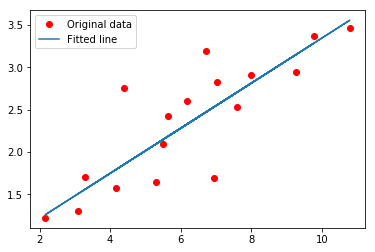

In [15]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [16]:
# Regression result